In [1]:
import numpy as np
import pandas as pd

#Fin Data Sourcees
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date
import datetime

In [2]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month-3, day=end.day - 20)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=22
Period for indexes: 1954-01-02 to 2024-04-22 


In [242]:
class Percent(float):
    def __str__(self):
        return '{:.1%}'.format(round(self,3))

#### Question 1
What is the average growth (in %) of GDP in 2023?

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1). Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers). Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer 5.7

In [3]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdpc = pdr.DataReader("GDPC1", "fred", start= start,end=end)

In [4]:
gdpc.head(12)

,GDPC1
DATE,
1954-04-01,2848.305
1954-07-01,2880.482
1954-10-01,2936.852
1955-01-01,3020.746
1955-04-01,3069.910
1955-07-01,3111.379
1955-10-01,3130.068
1956-01-01,3117.922
1956-04-01,3143.694


In [5]:
gdpc['gdpIn_yoy'] = gdpc.GDPC1/gdpc.GDPC1.shift(4)-1

In [6]:
gdpc

,GDPC1,gdpIn_yoy
DATE,,
1954-04-01,2848.305,NaN
1954-07-01,2880.482,NaN
1954-10-01,2936.852,NaN
1955-01-01,3020.746,NaN
1955-04-01,3069.910,0.077802
...,...,...
2022-10-01,21989.981,0.006517
2023-01-01,22112.329,0.017179
2023-04-01,22225.350,0.023825


In [7]:
gdpc["year"] = gdpc.index.year

In [8]:
gdpc

,GDPC1,gdpIn_yoy,year
DATE,,,
1954-04-01,2848.305,NaN,1954
1954-07-01,2880.482,NaN,1954
1954-10-01,2936.852,NaN,1954
1955-01-01,3020.746,NaN,1955
1955-04-01,3069.910,0.077802,1955
...,...,...,...
2022-10-01,21989.981,0.006517,2022
2023-01-01,22112.329,0.017179,2023
2023-04-01,22225.350,0.023825,2023


In [28]:
gdpc.groupby(["year"]).mean(["gdpIn_yoy"]).loc[2023]["gdpIn_yoy"]

0.02540443392867625

In [32]:
round(gdpc.groupby(["year"]).mean(["gdpIn_yoy"]).loc[2023]["gdpIn_yoy"] * 100 ,1)

2.5

In [35]:
print(Percent(gdpc.groupby(["year"]).mean(["gdpIn_yoy"]).loc[2023]["gdpIn_yoy"]))

2.54%


#### Question 2. [Macro] Inverse "Treasury Yield"
Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.

Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

In [10]:
df_dgs2 = pdr.DataReader("DGS2","fred",start=datetime.datetime(2000,1,1),end = end)
df_dgs10 = pdr.DataReader("DGS10","fred",start=datetime.datetime(2000,1,1),end = end)

In [11]:
df_dgs10.head()

,DGS10
DATE,
2000-01-03,6.58
2000-01-04,6.49
2000-01-05,6.62
2000-01-06,6.57
2000-01-07,6.52


In [12]:
df_dgs2.head()

,DGS2
DATE,
2000-01-03,6.38
2000-01-04,6.30
2000-01-05,6.38
2000-01-06,6.35
2000-01-07,6.31


In [13]:
joined_dfDgd = df_dgs10.join(df_dgs2, lsuffix='_caller', rsuffix='_other')

In [14]:
joined_dfDgd.head()

,DGS10,DGS2
DATE,,
2000-01-03,6.58,6.38
2000-01-04,6.49,6.30
2000-01-05,6.62,6.38
2000-01-06,6.57,6.35
2000-01-07,6.52,6.31


In [15]:
round(min(joined_dfDgd["DGS10"] - joined_dfDgd["DGS2"]),1)

-1.1

#### Question 3. [Index] Which Index is better recently?
Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

In [37]:
startIdx = date(year=end.year-5, month=end.month-3, day=end.day - 20)
print(f'Period for indexes: {start} to {end} ')

Period for indexes: 1954-01-02 to 2024-04-22 


In [124]:
def get_current_price(symbol):
    historical_data = yf.download(tickers = symbol,
                     period = "max",
                     interval = "1d")
    return historical_data

In [90]:
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-15 00:00:00-04:00,5149.669922,5168.430176,5052.470215,5061.819824,3950210000,0.0,0.0
2024-04-16 00:00:00-04:00,5064.589844,5079.839844,5039.830078,5051.410156,4006200000,0.0,0.0
2024-04-17 00:00:00-04:00,5068.970215,5077.959961,5007.250000,5022.209961,3596130000,0.0,0.0
2024-04-18 00:00:00-04:00,5031.520020,5056.660156,5001.890137,5011.120117,3619760000,0.0,0.0
2024-04-19 00:00:00-04:00,5005.439941,5019.020020,4953.560059,4967.229980,3878750000,0.0,0.0


In [125]:
snp500Idx = get_current_price('^GSPC')

[*********************100%%**********************]  1 of 1 completed


In [127]:
snp500Idx.shape

(24191, 6)

In [128]:
mxxIdx = get_current_price('^MXX')

[*********************100%%**********************]  1 of 1 completed


In [129]:
mxxIdx.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-15,56536.468750,56709.121094,55924.101562,55984.000000,55984.000000,170645700
2024-04-16,56009.730469,56148.000000,55626.750000,55797.250000,55797.250000,225862900
2024-04-17,55788.738281,56090.320312,55383.250000,55415.691406,55415.691406,244258900
2024-04-18,55597.789062,55941.621094,55585.820312,55739.429688,55739.429688,208671900
2024-04-19,55811.191406,56036.718750,55579.691406,55862.851562,55862.851562,138617600


In [131]:
snp500Idx.head()

,Open,High,Low,Close,Adj Close,Volume,change
Date,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,NaN
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,0.005663
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,-0.002252
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,-0.009594
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,0.006268


In [132]:
# normally 252 trading days
snp500Idx['adj_close_last_year'] = snp500Idx['Adj Close'].shift(252)
snp500Idx['yoy_growth'] = snp500Idx['Adj Close'] / snp500Idx['adj_close_last_year'] -1

In [133]:
# normally 252 trading days
mxxIdx['adj_close_last_year'] = mxxIdx['Adj Close'].shift(252)
mxxIdx['yoy_growth'] = mxxIdx['Adj Close'] / mxxIdx['adj_close_last_year'] -1

In [134]:
snp500Idx_truncated = snp500Idx[(snp500Idx.index>='2019-04-09')  & (snp500Idx.index <='2024-04-09')]
mxxIdx_truncated = mxxIdx[(mxxIdx.index>='2019-04-09')  & (mxxIdx.index <='2024-04-09')]

In [146]:
snp500Idx_truncated.tail()

,Open,High,Low,Close,Adj Close,Volume,change,adj_close_last_year,yoy_growth
Date,,,,,,,,,
2024-04-03,5194.370117,5228.750000,5194.370117,5211.490234,5211.490234,3703250000,0.001091,4109.310059,0.268215
2024-04-04,5244.049805,5256.589844,5146.060059,5147.209961,5147.209961,4075680000,-0.012334,4124.509766,0.247957
2024-04-05,5158.950195,5222.180176,5157.209961,5204.339844,5204.339844,3386780000,0.011099,4100.600098,0.269165
2024-04-08,5211.370117,5219.569824,5197.350098,5202.390137,5202.390137,3278180000,-0.000375,4090.379883,0.271860
2024-04-09,5217.029785,5224.810059,5160.779785,5209.910156,5209.910156,3400680000,0.001445,4105.020020,0.269156


<Axes: xlabel='Date'>

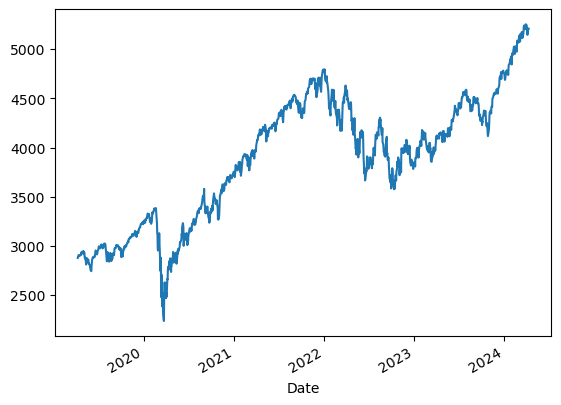

In [136]:
snp500Idx_truncated.Close.plot.line()

In [137]:
mxxIdx_truncated.head()

,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
2019-04-09,45346.828125,45346.828125,44854.531250,45151.628906,45151.628906,191575000,48331.511719,-0.065793
2019-04-10,45204.750000,45219.410156,44850.109375,44909.140625,44909.140625,145314900,48532.140625,-0.074652
2019-04-11,44872.531250,44966.500000,44373.488281,44580.058594,44580.058594,109090000,48782.558594,-0.086148
2019-04-12,44767.671875,44888.699219,44534.378906,44686.058594,44686.058594,143662400,48768.300781,-0.083707
2019-04-15,44649.738281,44900.929688,44347.531250,44625.781250,44625.781250,108627100,48434.390625,-0.078634


<Axes: xlabel='Date'>

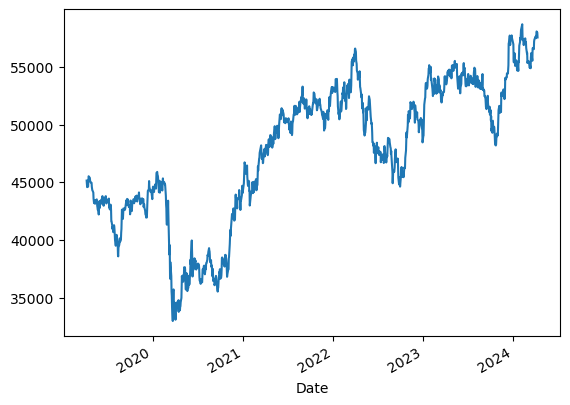

In [139]:
mxxIdx_truncated.Close.plot.line()

In [140]:
endValueMxx = mxxIdx_truncated.yoy_growth.iloc[-1] 
startValueMXX = mxxIdx_truncated.yoy_growth.iloc[0]

In [141]:
print(f"Growth of Mexico Index is {Percent(endValueMxx/startValueMXX - 1)}")

Growth of Mexico Index is -115.71%


In [145]:
print(f"Growth of S&P Index is {Percent(snp500Idx_truncated.yoy_growth.iloc[-1]/snp500Idx_truncated.yoy_growth.iloc[0] - 1)}")

Growth of S&P Index is 165.37%


<Axes: xlabel='Date'>

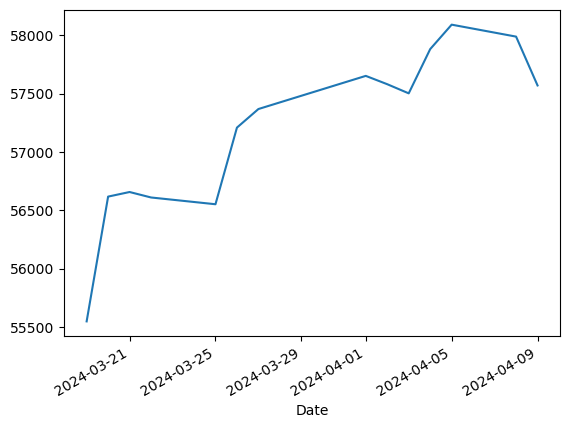

In [106]:
mxxIdx_truncated.Close.plot.line()

#### Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks
Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023

Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value. Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)

In [165]:
def get_OHLCV(symbol):
    historical_data = yf.download(tickers = symbol,
                     period = "2y",
                     interval = "1d")
    historical_data_truncated = historical_data[(historical_data.index>='2023-01-01')  & (historical_data.index <'2024-01-01')]
    return historical_data_truncated

In [177]:
def get_52Week_Range_Ration(df):
    return round((1 - min(df["Adj Close"])/max(df["Adj Close"])),2)

In [166]:
saudiAramcoIdx = get_OHLCV("2222.SR")

[*********************100%%**********************]  1 of 1 completed


In [172]:
saudiAramcoIdx.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-25,33.000000,33.099998,32.849998,33.099998,32.927525,15869070
2023-12-26,33.049999,33.099998,32.900002,33.049999,32.877789,14598967
2023-12-27,33.099998,33.250000,33.000000,33.150002,32.977268,14815683
2023-12-28,33.150002,33.250000,32.950001,33.049999,32.877789,12720450
2023-12-31,33.049999,33.099998,32.900002,33.000000,32.828049,10776909


In [178]:
saudiAramcoRatio = get_52Week_Range_Ration(saudiAramcoIdx)
print(saudiAramcoRatio)

0.21


In [167]:
brkShrIdx = get_OHLCV("BRK-B")

[*********************100%%**********************]  1 of 1 completed


In [179]:
brkShrIdxRatio = get_52Week_Range_Ration(brkShrIdx)
print(brkShrIdxRatio)

0.21


In [168]:
appIdx = get_OHLCV("AAPL")

[*********************100%%**********************]  1 of 1 completed


In [180]:
appIdxRatio = get_52Week_Range_Ration(appIdx)
print(appIdxRatio)

0.37


In [169]:
msftIdx = get_OHLCV("MSFT")

[*********************100%%**********************]  1 of 1 completed


In [181]:
msftIdxRatio = get_52Week_Range_Ration(msftIdx)
print(msftIdxRatio)

0.42


In [170]:
googIdx = get_OHLCV("GOOG")

[*********************100%%**********************]  1 of 1 completed


In [182]:
googIdxRatio = get_52Week_Range_Ration(googIdx)
print(googIdxRatio)

0.39


In [171]:
jpmIdx = get_OHLCV("JPM")

[*********************100%%**********************]  1 of 1 completed


In [183]:
jpmIdxRatio = get_52Week_Range_Ration(jpmIdx)
print(jpmIdxRatio)

0.28


In [185]:
print(max(saudiAramcoRatio,brkShrIdxRatio,appIdxRatio,msftIdxRatio,googIdxRatio,jpmIdxRatio))

0.42


#### Question 5. [Stocks] Dividend Yield
Find the largest dividend yield for the same set of stocks

Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023. You can use get_actions() method or .dividends field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

Find the maximm value in % and round to 1 digit after the decimal point. (E.g., if you obtained $1.25 dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3)

In [231]:
symbols = ['2222.SR','BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

def get_largest_dividend_yield(ls):
    allDividents = []
    for ticker in symbols:
        tickr = yf.Ticker(ticker)
        historical_data = yf.download(tickers = ticker,period = "2y",interval = "1d")
        historical_data_truncated = historical_data[(historical_data.index>='2023-01-01')  & (historical_data.index <'2024-01-01')]
        dividends = tickr.dividends
        dividents_Truncated = dividends[(dividends.index>='2023-01-01')  & (dividends.index <'2024-01-01')]
        totalDividents = sum(dividents_Truncated)
        div_yield = totalDividents/historical_data_truncated.iloc[-1]["Adj Close"]
        allDividents.append((div_yield,ticker))
    return max(allDividents)
        

In [232]:
largest_yield = get_largest_dividend_yield(symbols)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [233]:
print(largest_yield)

(0.027743470474138235, '2222.SR')


In [243]:
print(Percent(largest_yield[0]))

2.8%
